<a href="https://colab.research.google.com/github/Sukuratsalam/Diabetes-Prediction-Project/blob/main/Diabetes_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 37.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install -U scikit-learn

In [ ]:
#Importing some important libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RepeatedKFold, learning_curve, train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.feature_selection import RFE, SelectFromModel
#from sklearn.metrics import accuracy_score ,  plot_roc_curve,RocCurveDisplay
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay,PrecisionRecallDisplay, f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:

file_path = '/content/drive/My Drive/diabetes.csv'
df = pd.read_csv(file_path)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


### Counting Unique Values

In [ ]:
# Checking the number of uniques values for each coloumns

dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


### Checking for missing values in the dataset

In [ ]:
# Checking for columns with missing values
df.isnull().any()

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

### Checking for duplicate

In [ ]:
#Print total number of duplicates
df.duplicated().sum()

23899

##### Dropping the duplicated observation

In [ ]:
#Removing the duplicates in the dataset
df = df.drop_duplicates()
print(df.shape)

(229781, 22)


### Plotting the histogram of the dataset

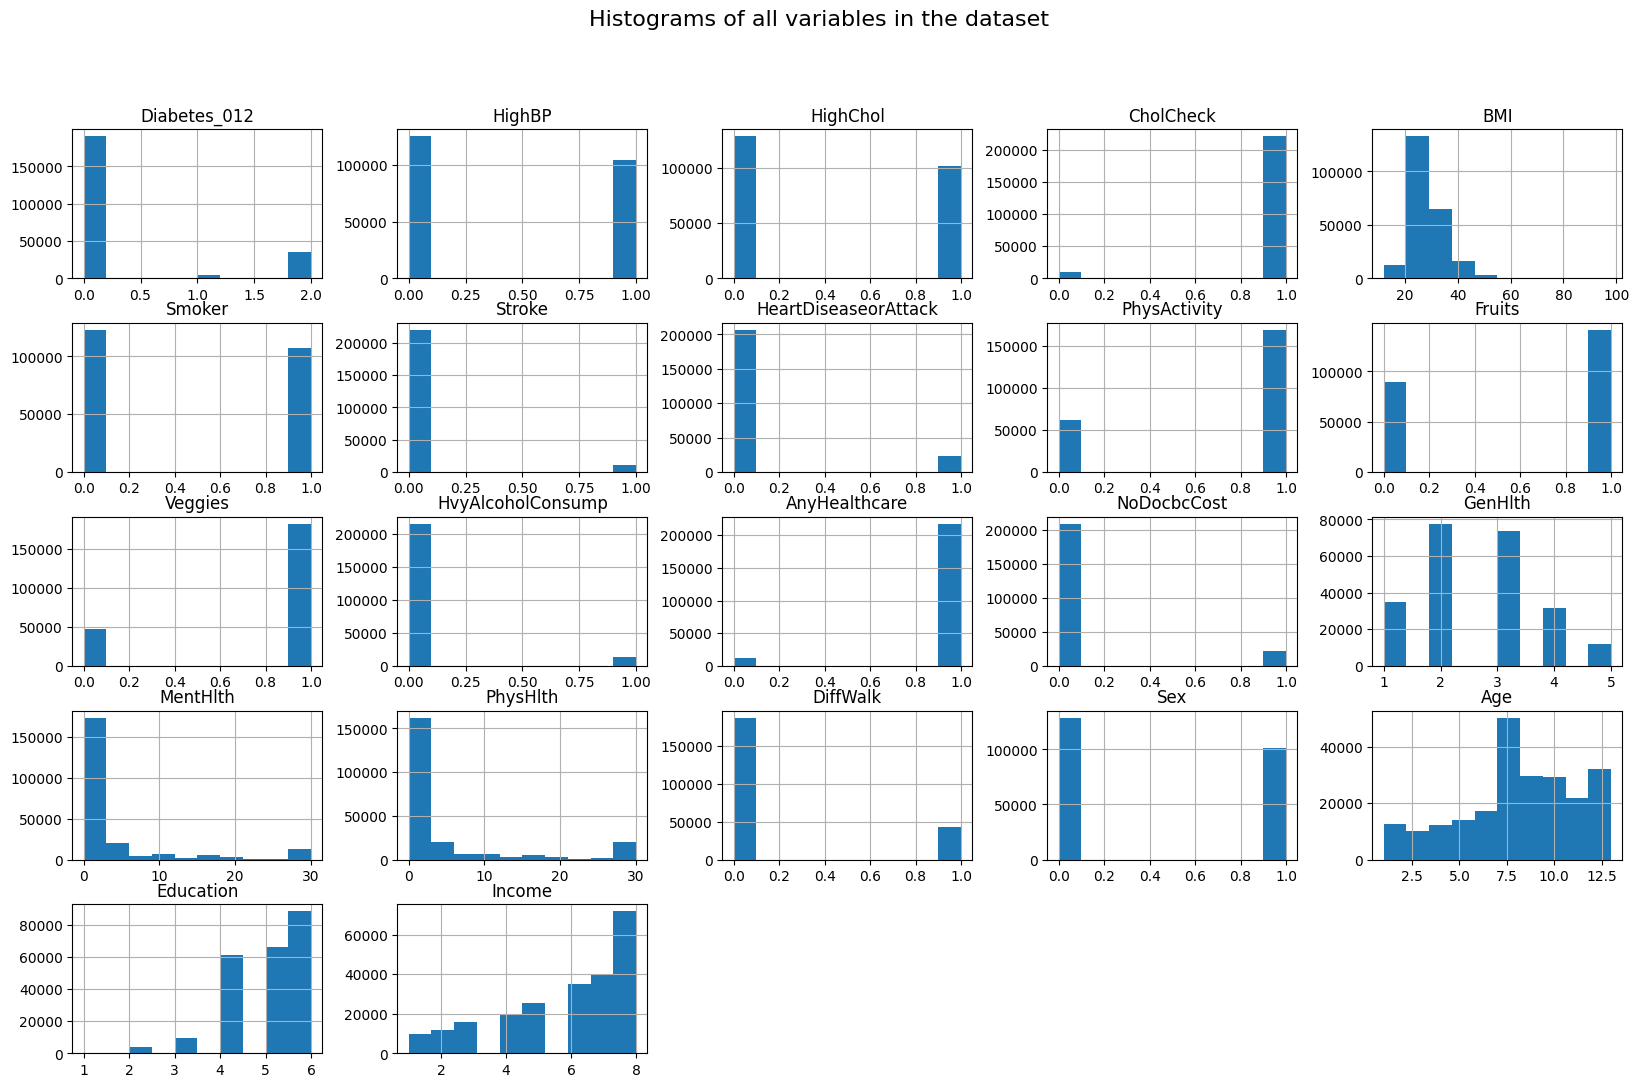

In [ ]:
# Histogram to get the overview
#of the count of the categorical data

df.hist(figsize=(20,12));
plt.suptitle("Histograms of all variables in the dataset ", fontsize=16)
plt.show()

##### Seperating the categorical and numeric features

In [ ]:
# Seperating the categorical column from continious column
cat_features = ['HighBP', 'HighChol', 'CholCheck','Smoker','HeartDiseaseorAttack',
       'Stroke ', 'PhysActivity','Fruits','Veggies ','HvyAlcoholConsump',
        'NoDocbcCost','GenHlth','DiffWalk','Sex','Age',
        'Education','Income']
num_features = ['BMI','MentHlth','PhysHlth']
target = ['Diabetes_012']

##### Descriptive Statistics of the Numeriacl Features

In [ ]:
# checking the descriptive statistics of the numeric features
df[num_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
MentHlth,229781.0,3.505373,7.713725,0.0,0.0,0.0,2.0,30.0
PhysHlth,229781.0,4.675178,9.046568,0.0,0.0,0.0,4.0,30.0


### Outilier Detection in the Numeric Features

 Boxplots of the numeric features for outlier detection


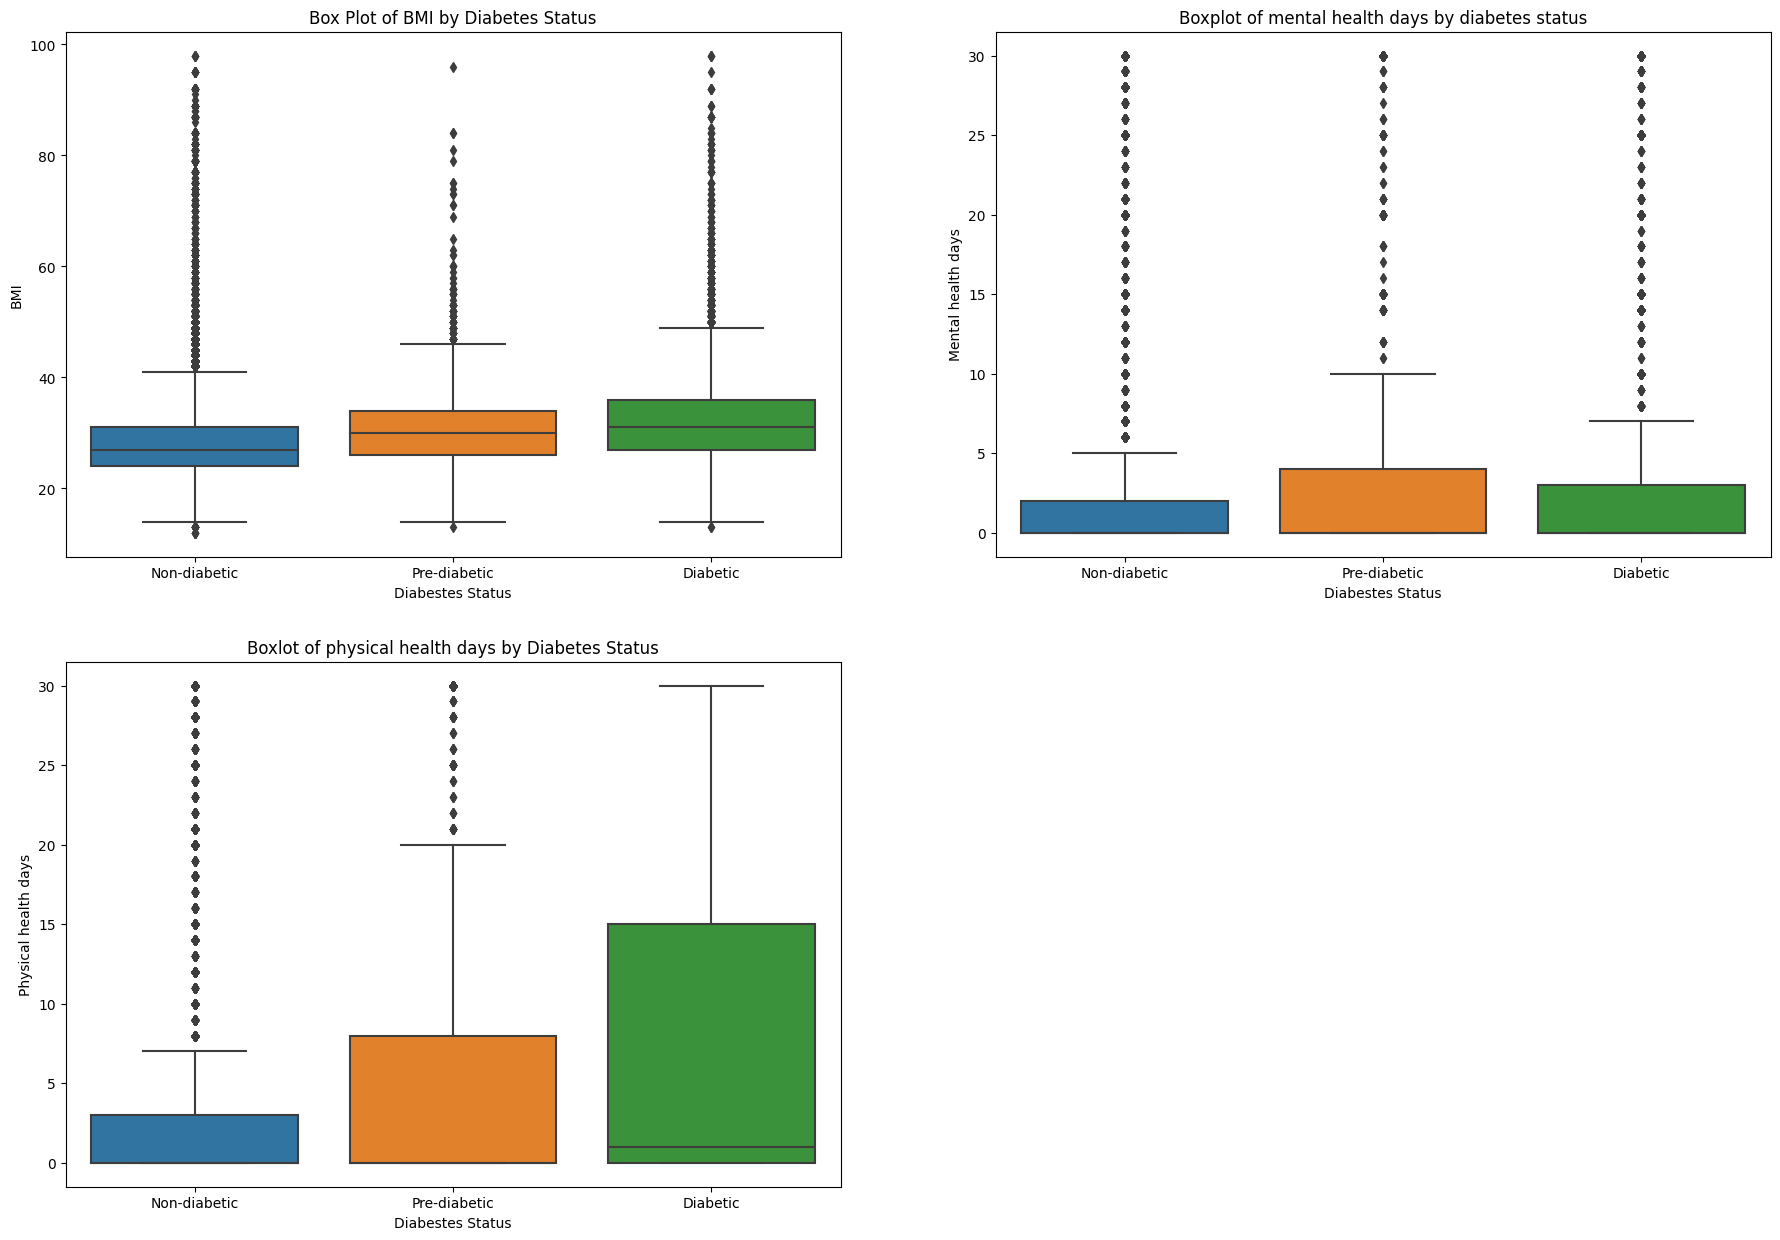

In [ ]:
#Checking for outliers in BMI, MentHlth, and PhysHlth
#Plotting countplot for the binary outcome variables

print(f' Boxplots of the numeric features for outlier detection')
plt.figure(figsize=(22,15))

plt.subplot(2,2,1)
# Create the box plot
sns.boxplot(x=df['Diabetes_012'], y=df['BMI'])
plt.xticks([0, 1, 2], ['Non-diabetic','Pre-diabetic','Diabetic'])
# Add labels to the axes
plt.xlabel('Diabestes Status')
plt.ylabel('BMI')
plt.title("Box Plot of BMI by Diabetes Status")

plt.subplot(2,2,2)
# Create the box plot
sns.boxplot(x=df['Diabetes_012'], y=df['MentHlth'])
plt.xticks([0, 1, 2], ['Non-diabetic','Pre-diabetic','Diabetic'])
# Add labels to the axes
plt.xlabel('Diabestes Status')
plt.ylabel('Mental health days')
plt.title("Boxplot of mental health days by diabetes status")

plt.subplot(2,2,3)
# Create the box plot
sns.boxplot(x=df['Diabetes_012'], y=df['PhysHlth'])
plt.xticks([0, 1, 2], ['Non-diabetic','Pre-diabetic','Diabetic'])
# Add labels to the axes
plt.xlabel('Diabestes Status')
plt.ylabel('Physical health days')
plt.title("Boxlot of physical health days by Diabetes Status")



plt.show()

Diabetes status of respondents


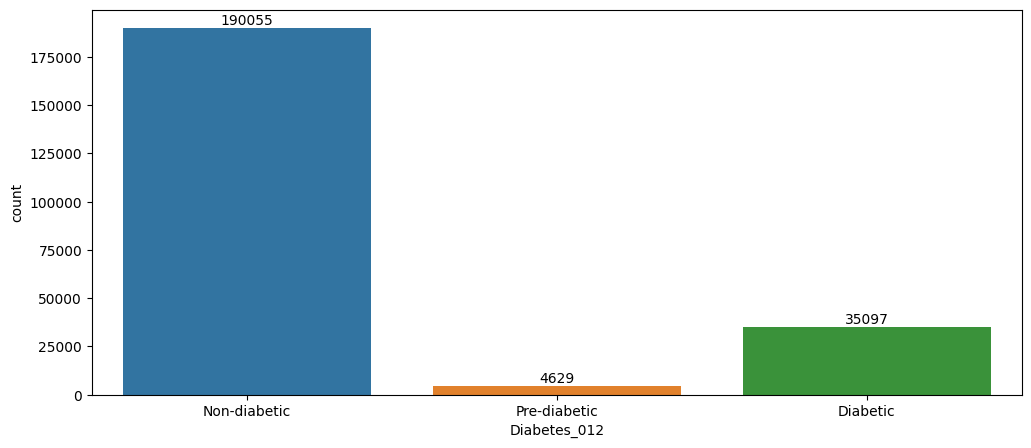

In [ ]:
plt.figure(figsize=(12,5))
x = df["Diabetes_012"].value_counts()
#x = df['HighBp'].value_counts()
print(f'Diabetes status of respondents')
p = sns.countplot(data= df, x="Diabetes_012")
# Add labels to the bars
for bar in p.patches:
    p.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
               ha='center', va='center',
               xytext=(0, 5), textcoords='offset points')
    # Change axis labels
p.set_xticklabels(['Non-diabetic','Pre-diabetic','Diabetic'])
plt.show()


0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64


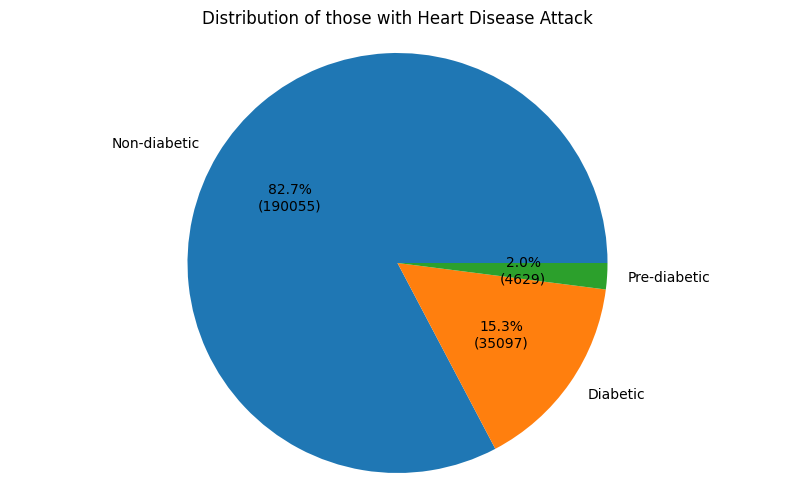

In [ ]:
plt.figure(figsize=(10, 6))
diabetes_counts = df["Diabetes_012"].value_counts()

# Print the counts
print(diabetes_counts)

# Create the pie chart
plt.pie(diabetes_counts, labels=['Non-diabetic','Diabetic','Pre-diabetic'],
        autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(diabetes_counts) / 100))
# Set equal aspect ratio for a circular pie chart
plt.axis('equal')

# Add a title to the pie chart
plt.title("Distribution of those with Heart Disease Attack")

plt.show()

Number of adult who  have been told they have high blood pressure by  a doctor is 104422 and number of people adult that donot have is 125359


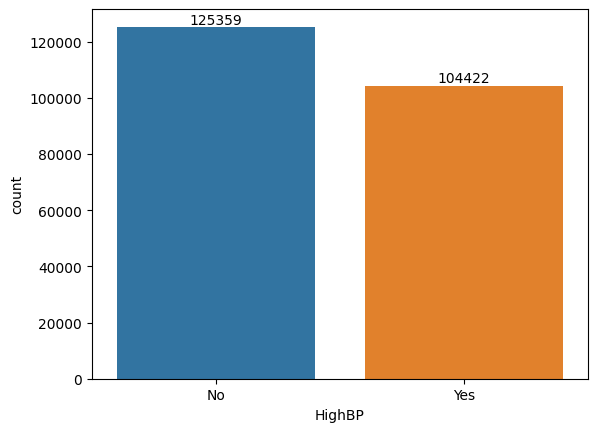

In [ ]:
x = df["HighBP"].value_counts()
#x = df['HighBp'].value_counts()
print(f'Number of adult who  have been told they have high blood pressure by  a doctor is {x[1]} and number of people adult that donot have is {x[0]}')
p = sns.countplot(data= df, x="HighBP")
# Add labels to the bars
for bar in p.patches:
    p.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
               ha='center', va='center',
               xytext=(0, 5), textcoords='offset points')
    # Change axis labels
p.set_xticklabels(['No', 'Yes'])
plt.show()

Hаvе уоu ѕmоkеd аt least 100 сіgаrеttеѕ in уоur еntіrе lіfе?


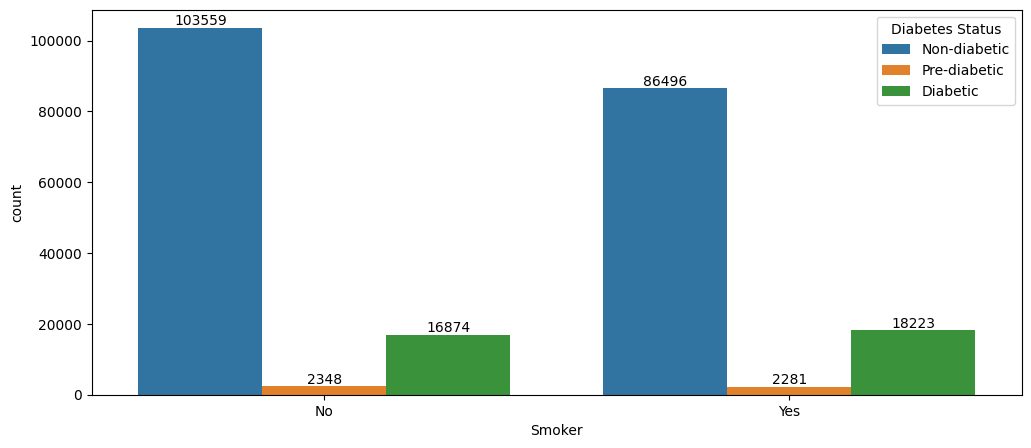

In [ ]:
#x = df["Smoker"].value_counts()
#x = df['HighBp'].value_counts()
plt.figure(figsize=(12,5))
print(f'Hаvе уоu ѕmоkеd аt least 100 сіgаrеttеѕ in уоur еntіrе lіfе?')
#p = sns.countplot(data= df, x="Smoker")
legend_labels = ['Non-diabetic', 'Pre-diabetic', 'Diabetic']
p = sns.countplot(x='Smoker', hue='Diabetes_012', data= df)
for bar in p.patches:
    p.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
               ha='center', va='center',
               xytext=(0, 5), textcoords='offset points')
    # Change axis labels
p.set_xticklabels(['No', 'Yes'])

handles, _ = p.get_legend_handles_labels()
p.legend(handles, legend_labels, title="Diabetes Status")

plt.show()

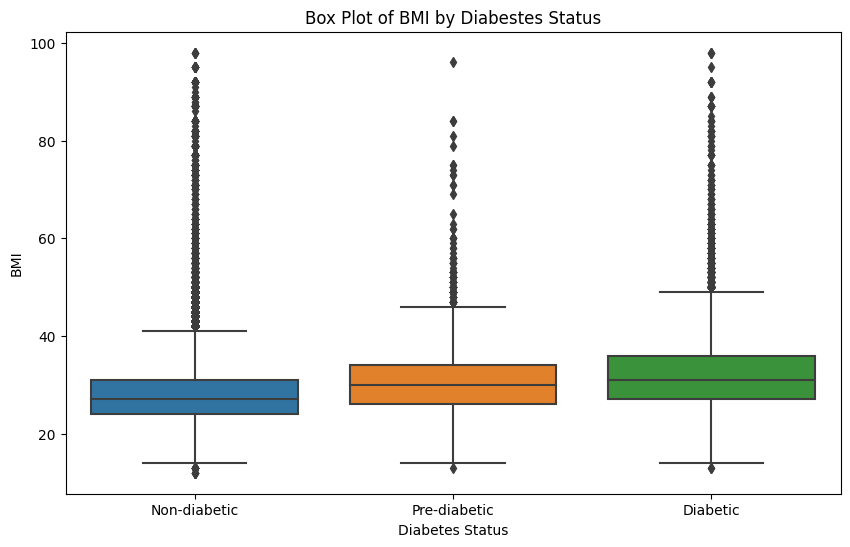

In [ ]:
plt.figure(figsize=(10, 6))
# Create the box plot
sns.boxplot(x=df['Diabetes_012'], y=df['BMI'])

# Set x-axis tick labels
plt.xticks([0, 1,2], ['Non-diabetic', 'Pre-diabetic', 'Diabetic'])

# Add labels to the axes
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')

plt.title("Box Plot of BMI by Diabestes Status")

plt.show()

<Figure size 1296x1008 with 0 Axes>

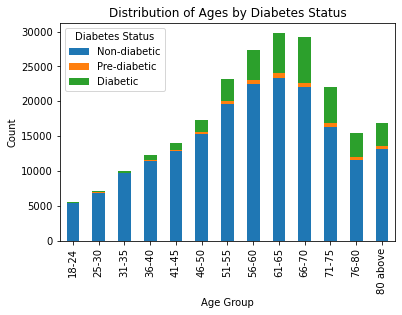

In [ ]:
plt.figure(figsize=(18, 14))
# Assuming df is your DataFrame
# Create a pivot table to aggregate counts for each age group and diabetes status
pivot_df = df.pivot_table(index='Age', columns='Diabetes_012', aggfunc='size', fill_value=0)

legend_labels = ['Non-diabetic', 'Pre-diabetic', 'Diabetic']
# Create the stacked bar chart
p = pivot_df.plot(kind='bar', stacked=True)

# Set the labels for the x-axis
p.set_xticklabels(['18-24', '25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '80 above'], rotation=90)

# Set labels for the plot
plt.title("Distribution of Ages by Diabetes Status")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Display the legend
handles, _ = p.get_legend_handles_labels()
p.legend(handles, legend_labels, title="Diabetes Status")
plt.show()

<Figure size 1296x1008 with 0 Axes>

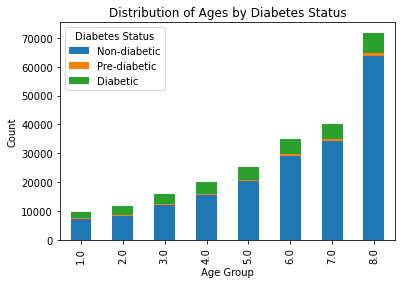

In [ ]:
plt.figure(figsize=(18, 14))
# Assuming df is your DataFrame
# Create a pivot table to aggregate counts for each age group and diabetes status
pivot_df = df.pivot_table(index='Income', columns='Diabetes_012', aggfunc='size', fill_value=0)

legend_labels = ['Non-diabetic', 'Pre-diabetic', 'Diabetic']
# Create the stacked bar chart
p = pivot_df.plot(kind='bar', stacked=True)

# Set the labels for the x-axis
#p.set_xticklabels(['18-24', '25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '80 above'], rotation=90)

# Set labels for the plot
plt.title("Distribution of Ages by Diabetes Status")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Display the legend
handles, _ = p.get_legend_handles_labels()
p.legend(handles, legend_labels, title="Diabetes Status")
plt.show()

In [ ]:
# checking the descriptive statistics of the data
df[['BMI','MentHlth','PhysHlth']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
MentHlth,229781.0,3.505373,7.713725,0.0,0.0,0.0,2.0,30.0
PhysHlth,229781.0,4.675178,9.046568,0.0,0.0,0.0,4.0,30.0


<AxesSubplot:>

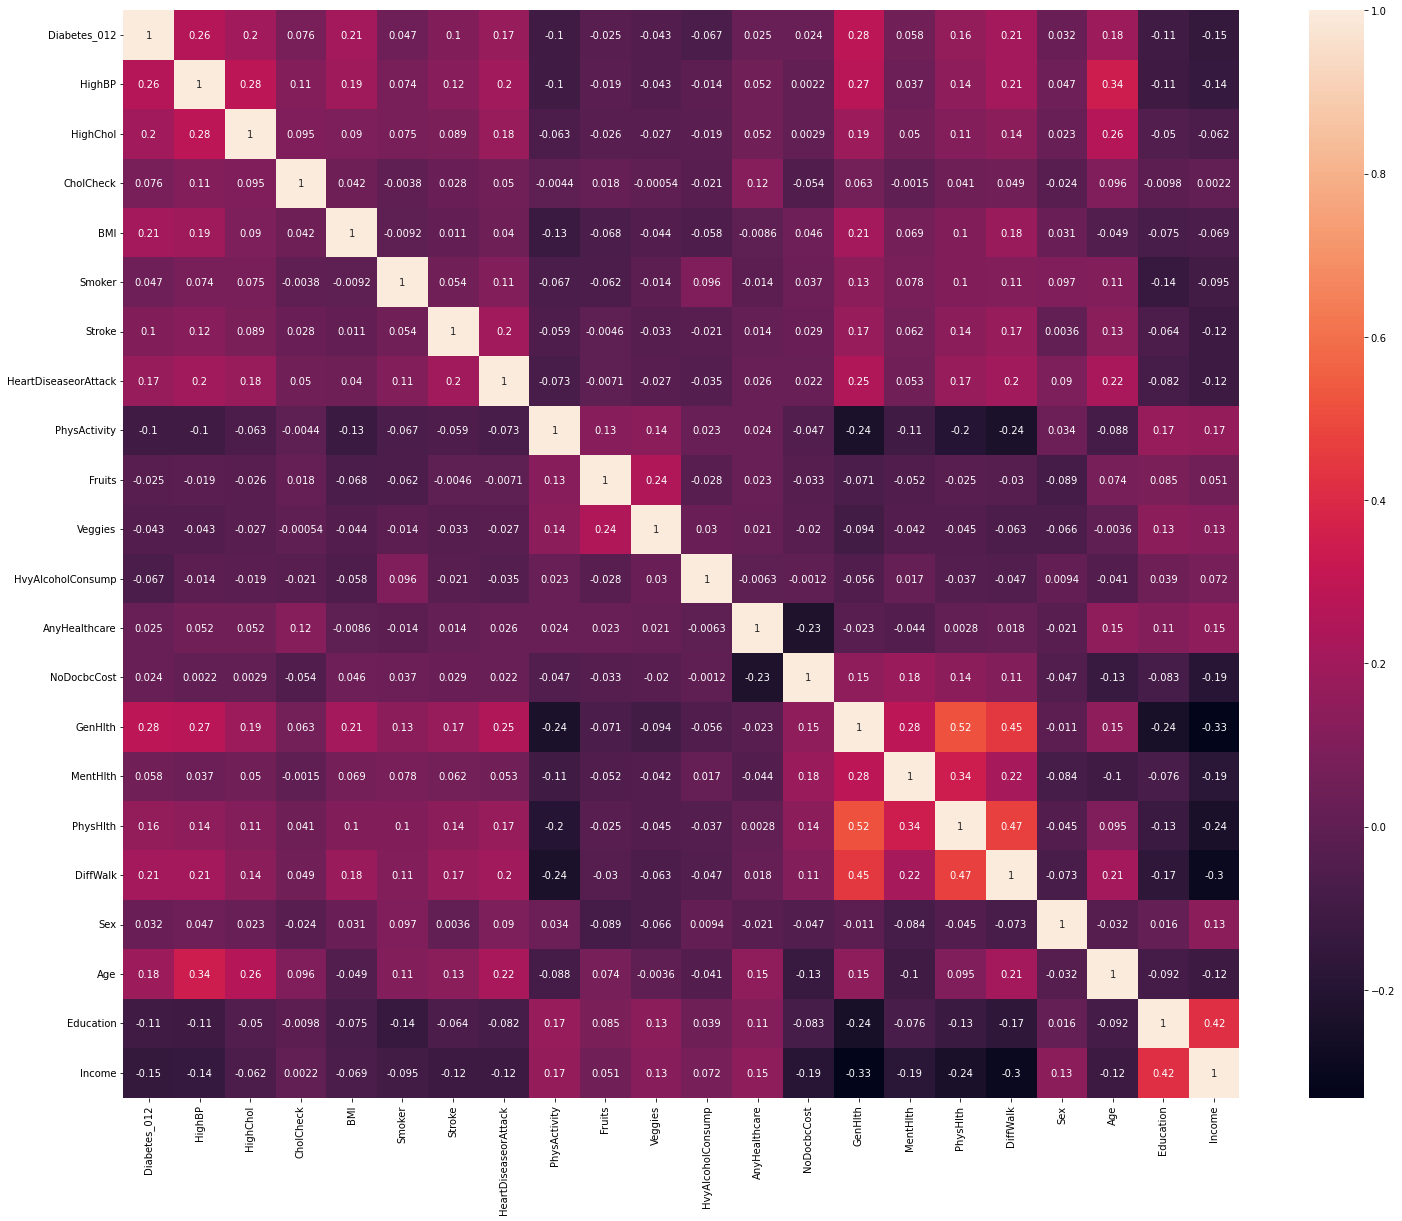

In [ ]:
#Checking for the relationship among the variables using correlation matrix and heatmap

df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True)

#### Outlier Detection Using Ensemble Method (IsolationForest)

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np


# Fit the Isolation Forest model
# Set contamination parameter to the expected proportion of outliers
clf = IsolationForest(n_estimators=200,contamination=0.05,random_state=42)
clf.fit(df)

# Predict outliers (1 for inliers, -1 for outliers)
df['outlier']=clf.predict(df)

# Get the indices of outliers
outlier_indices = np.where(df['outlier']== -1)[0]

# Print indices of detected outliers


<ipython-input-5-4fa9248a5c8e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier']=clf.predict(df)


In [ ]:
outliers_ = df[df['outlier']==-1]
outliers_

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,outlier
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,-1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,-1
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0,-1
14,0.0,0.0,1.0,1.0,33.0,1.0,1.0,0.0,1.0,0.0,...,1.0,4.0,30.0,28.0,0.0,0.0,4.0,6.0,2.0,-1
20,0.0,1.0,1.0,1.0,22.0,0.0,1.0,1.0,0.0,1.0,...,0.0,3.0,30.0,0.0,1.0,0.0,12.0,4.0,4.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253626,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,10.0,30.0,1.0,0.0,5.0,5.0,2.0,-1
253630,2.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,...,1.0,4.0,30.0,5.0,0.0,1.0,9.0,4.0,5.0,-1
253665,0.0,0.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,30.0,30.0,0.0,0.0,5.0,4.0,1.0,-1
253670,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0,-1


In [ ]:
df.drop(df[df['outlier']==-1].index,inplace = True)
df1 = df
df1

<ipython-input-7-c13b877906f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['outlier']==-1].index,inplace = True)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,outlier
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,1
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,1
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,1
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,1
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,1
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,1


Diabetes status of respondents


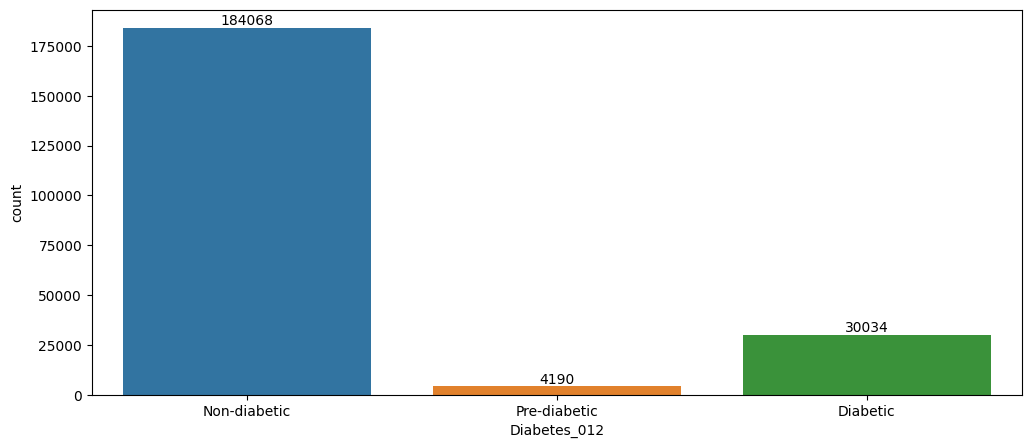

In [ ]:
plt.figure(figsize=(12,5))
x = df1["Diabetes_012"].value_counts()
#x = df['HighBp'].value_counts()
print(f'Diabetes status of respondents')
p = sns.countplot(data= df, x="Diabetes_012")
# Add labels to the bars
for bar in p.patches:
    p.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2, bar.get_height()),
               ha='center', va='center',
               xytext=(0, 5), textcoords='offset points')
    # Change axis labels
p.set_xticklabels(['Non-diabetic','Pre-diabetic','Diabetic'])
plt.show()

## Modeling Section

In [ ]:
#Dropping the target or the response variable'HeartDiseaseorAttack' variable 'HeartDiseaseorAttack'
X = df1.drop(columns = ['Diabetes_012','outlier']).copy()
y = df1['Diabetes_012']

In [ ]:
# Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("y:", y.shape)
print(" ")
print("X: ", X.shape)


y: (218292,)
 
X:  (218292, 21)


## Scaling the features

### Robust Scaling

In [ ]:
from sklearn.model_selection import train_test_split

#Target Scaling
print("y_target:", y.shape)
print(" ")

# Feature Scaling
cols = X.columns
scale_X = RobustScaler()
X_scale = pd.DataFrame(scale_X.fit_transform(X), columns=cols)

print("X_scale: ", X_scale.shape)


# Train and Test datasets
X_train_robust, X_test_robust, y_train_robust, y_test_robust = train_test_split(X_scale,y, test_size = 0.2, random_state = 42)





y_target: (218292,)
 
X_scale:  (218292, 21)


### Standard Scaling

In [ ]:
from sklearn.model_selection import train_test_split

#Target Scaling
print("y_target:", y.shape)
print(" ")

# Feature Scaling
cols = X.columns
scale_X_S = StandardScaler()
X_scale_S = pd.DataFrame(scale_X_S.fit_transform(X), columns=cols)

print("X_scale_S:", X_scale_S.shape)



# Train and Test datasets
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_scale_S,y, test_size = 0.2, random_state = 42)

y_target: (218292,)
 
X_scale_S: (218292, 21)


### Model Training

In [ ]:
# Convert to NumPy arrays if they are not already
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train_robust = np.array(X_train_robust)
y_train_robust = np.array(y_train_robust)
X_test_robust = np.array(X_test_robust)
y_test_robust = np.array(y_test_robust)

X_train_standard = np.array(X_train_standard)
y_train_standard = np.array(y_train_standard)
X_test_standard = np.array(X_test_standard)
y_test_standard = np.array(y_test_standard)

# Datasets list
X_train_list = [X_train, X_train_robust, X_train_standard]
y_train_list = [y_train, y_train_robust, y_train_standard]
X_test_list = [X_test, X_test_robust, X_test_standard]
y_test_list = [y_test, y_test_robust, y_test_standard]

modeling_data_list = ["Original", "Standard", "Robust"]

### Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier

def Dummy_model(modeling_data, X_train, y_train, X_test, y_test):
    dummy = DummyClassifier(strategy= "most_frequent", random_state = 0)
    score_Dummy = []
    for i in range(0,len(X_train)):
        dummy = dummy.fit(X_train[i], y_train[i])
        score_dummy = dummy.score(X_train[i], y_train[i])
        score_Dummy.append(score_dummy)
        y_pred_Dummy = dummy.predict(X_test[i])
    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Dummy score'] = score_Dummy
    return Summary

In [ ]:
Dummy_summary = Dummy_model(modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Dummy_summary

,dataset,Dummy score
0,Original,0.843489
1,Standard,0.843489
2,Robust,0.843489


### Feature Selection

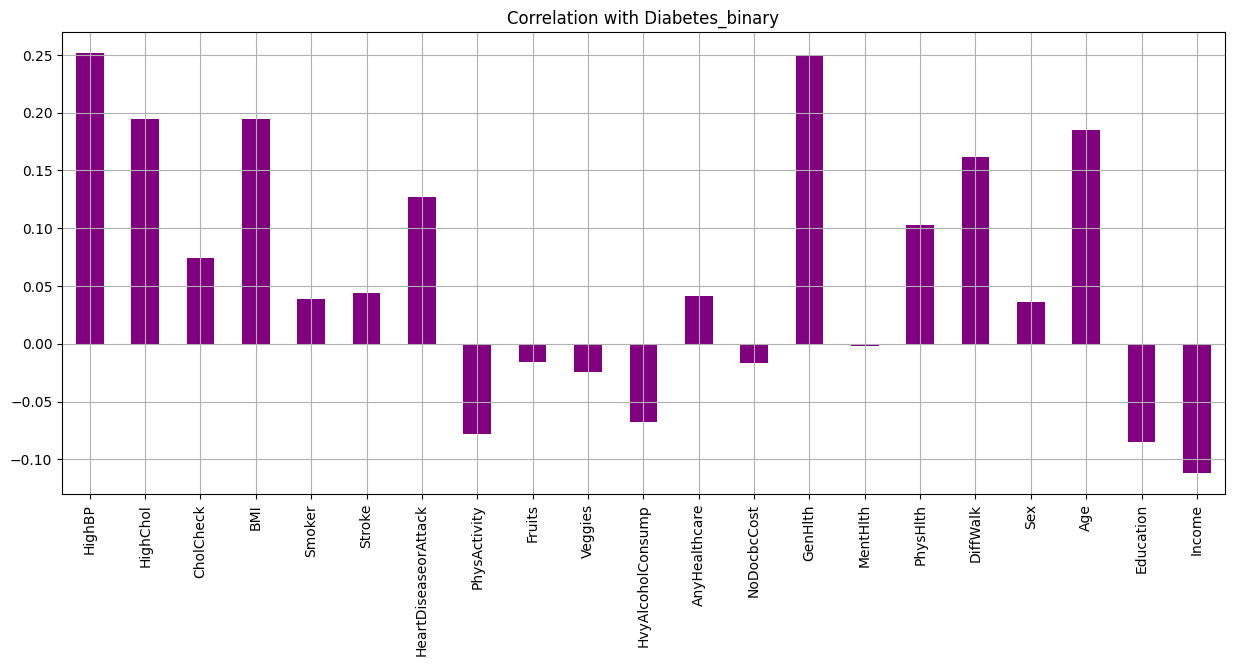

In [ ]:
df1.drop(['Diabetes_012','outlier'], axis=1).corrwith(df1.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="purple");

In [ ]:
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

def oversampling(algorithm, X_train, X_test, y_train, y_test):
    # Apply oversample algorithm to the training data
    oversample = algorithm(random_state=42)
    X_train_oversample, y_train_oversample = oversample.fit_resample(X_train, y_train)
    X_train_oversample_shape = X_train_oversample.shape
    y_train_oversample_shape = y_train_oversample.shape
    y_train_oversample_series = pd.Series(y_train_oversample)

    # Create and display a bar plot for class distribution
    y_train_oversample_series = pd.Series(y_train_oversample)
    # Create and display a bar plot for class distribution
    y_train_oversample_series.value_counts(normalize=True).plot.bar(title='Class Distribution After oversampling')
    plt.show()

    # Dummy Classifier on ADASYN dataset
    dummy_classifier = DummyClassifier()
    dummy_classifier.fit(X_train_oversample, y_train_oversample)
    y_pred_Dummy_oversample = dummy_classifier.predict(X_test)

    # Calculate and print the accuracy score
    score_Dummy_oversample = dummy_classifier.score(X_test, y_test)

    print("X_train oversampled shape", X_train_oversample_shape)
    print("y_train oversampled shape", y_train_oversample_shape)
    print("DummyClassifier score: ", score_Dummy_oversample)
    print(" ")

    return X_train_oversample_shape, y_train_oversample_shape, y_pred_Dummy_oversample, score_Dummy_oversample

Running Oversampling for Algorithm: SMOTE


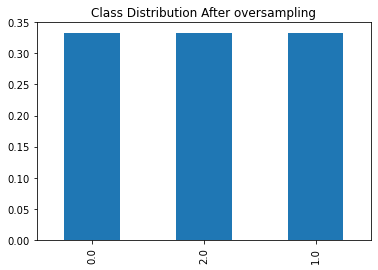

X_train oversampled shape (455817, 21)
y_train oversampled shape (455817,)
DummyClassifier score:  0.8293839893813783
 
Running Oversampling for Algorithm: ADASYN


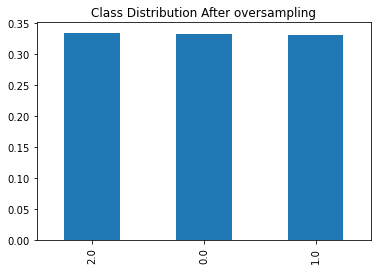

X_train oversampled shape (456071, 21)
y_train oversampled shape (456071,)
DummyClassifier score:  0.1509019300650608
 
Running Oversampling for Algorithm: SMOTETomek


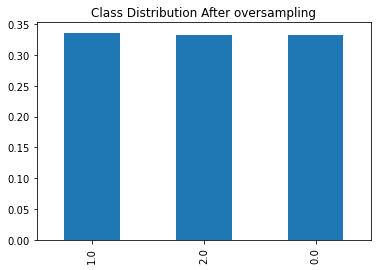

X_train oversampled shape (451053, 21)
y_train oversampled shape (451053,)
DummyClassifier score:  0.01971408055356094
 
Running Oversampling for Algorithm: SMOTEENN


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN


# List of oversampling algorithms to test
oversampling_algorithms = [SMOTE, ADASYN, SMOTETomek, SMOTEENN]
X_train = X_train_standard
X_test = X_test_standard
y_train = y_train_standard
y_test = y_test_standard

# Create a list to store the results
results = []

# Run oversampling for each algorithm
for algorithm in oversampling_algorithms:
    print(f"Running Oversampling for Algorithm: {algorithm.__name__}")
    result = oversampling(algorithm, X_train, X_test, y_train, y_test)
    results.append(result)

# Create a DataFrame to store the results
oversampling_results = pd.DataFrame({
    "Algorithm": [algorithm.__name__ for algorithm in oversampling_algorithms],
    "X_train_oversample_shape": [result[0] for result in results],
    "y_train_oversample_shape": [result[1] for result in results],
    "score_Dummy_oversample": [result[3] for result in results]
})

oversampling_results

### KNN Classifer

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

#Train the model for various depths - FOR loop
score_KNN_le = []
score_KNN_train_le = []
for k in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn_model.fit(X_train, y_train)
    y_pred_KNN_smoteenn = knn_model.predict(X_test)
    #Evaluate the model (Accuracy)
    score_knn = metrics.accuracy_score(y_test, y_pred_KNN_smoteenn)
    score_KNN_le.append(score_knn)
    #Check accuracy on train data (NOT VALID!)
    score_knn_train = metrics.accuracy_score(y_train, knn_model.predict(X_train))
    score_KNN_train_le.append(score_knn_train)
    KNN_dict = {k+1:v for k,v in enumerate(score_KNN_le)}
    opt_n_neighbors = max(KNN_dict, key=KNN_dict.get)

print(f"Max KNN scores is {max(score_KNN_le)} for k_neighbors: {opt_n_neighbors}")
print()

plt.plot(score_KNN_le, color="g", label='Acc. on test')
plt.plot(score_KNN_train_le, color="r", label='Acc. on train')
plt.ylabel('KNN scores')

### Balancing the data using SMOTE methods


In [ ]:
!pip uninstall imbalanced-learn -y
!pip install imbalanced-learn

Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install -U scikit-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote_ = SMOTE()
X_resampled, y_resampled = smote_.fit_resample(X_scale_S,y)
X_train_resample,X_test_resample,y_train_resample,y_test_resample = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### KNN Classifier

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.81      0.85     36649
         1.0       0.94      0.99      0.96     36931
         2.0       0.86      0.90      0.88     36861

    accuracy                           0.90    110441
   macro avg       0.90      0.90      0.90    110441
weighted avg       0.90      0.90      0.90    110441



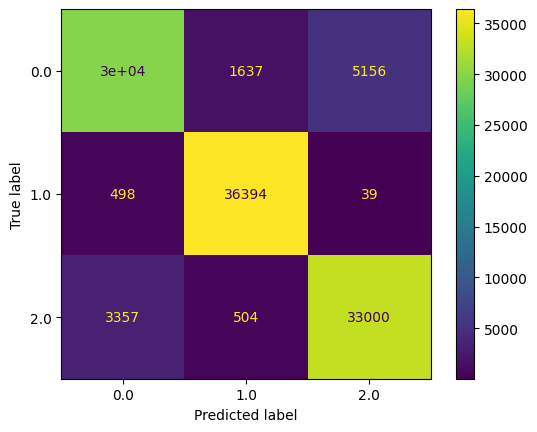

,Accuracy on test,Accuracy on train,KFold score,"F1 score 0, 1,2"
0,0.89867,0.982423,0.892583,0.897507


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
accuracy_train = []
accuracy_test = []
f1_score = []
kf_scores = []
knn = KNeighborsClassifier(n_neighbors= 2)
KNN = knn.fit(X_train_resample, y_train_resample)
y_pred = KNN.predict(X_test_resample)
accuracy_test_ = metrics.accuracy_score(y_test_resample, y_pred)
accuracy_train_ = metrics.accuracy_score(y_train_resample, KNN.predict(X_train_resample))
f1_score_ = metrics.f1_score(y_test_resample, y_pred, average="macro")

accuracy_train.append(accuracy_train_)
accuracy_test.append(accuracy_test_)
f1_score.append(f1_score_)
#K-Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)
kf_scores_ = cross_val_score(knn, X_train_resample, y_train_resample, cv=kf)
kf_scores.append(kf_scores_.mean())
report = classification_report(y_test_resample, y_pred)
#Attaching it to a summary table
Summary = pd.DataFrame()
Summary['Accuracy on test'] = accuracy_test
Summary['Accuracy on train'] = accuracy_train
Summary['KFold score'] = kf_scores
Summary['F1 score 0, 1,2'] = f1_score

print("Classification Report:\n", report)
#Returning the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn , X_test_resample , y_test_resample)
plt.show()
Summary

#### Feature Improtance for KNN Classifier

In [ ]:

feature_names =df1.columns.tolist()

# Evaluate the model's accuracy on the test set
accuracy = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy with all features: {accuracy:.4f}")

# Calculating feature importances
feature_importances = []

for i in range(X.shape[1]):
    X_train_subset = X_train_resample.copy()
    X_test_subset = X_test_resample.copy()

    # Removing the i-th feature from the dataset
    X_train_subset[:, i] = 0
    X_test_subset[:, i] = 0

    # Retraining the model without the i-th feature
    knn.fit(X_train_subset, y_train_resample)
    accuracy_subset = accuracy_score(y_test_resample, knn.predict(X_test_subset))

    # Computing the difference in accuracy
    importance = accuracy - accuracy_subset
    feature_importances.append(importance)

# Display feature importances with corresponding names
print("Feature Importances:")
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance:.4f}")


Accuracy with all features: 0.6103


TypeError: ignored

### GNB Classifier

Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.55      0.57     36649
         1.0       0.40      0.15      0.21     36931
         2.0       0.44      0.75      0.56     36861

    accuracy                           0.48    110441
   macro avg       0.48      0.48      0.45    110441
weighted avg       0.48      0.48      0.45    110441



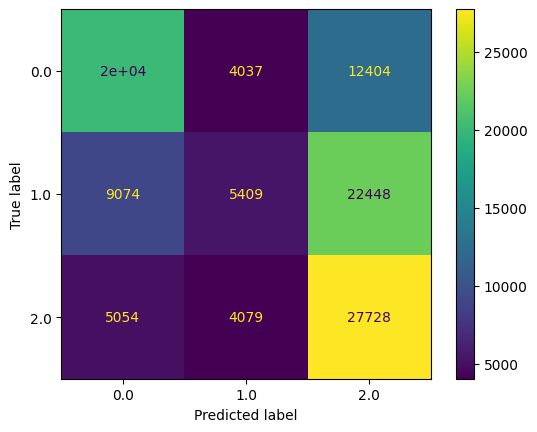

,Accuracy on test,Accuracy on train,KFold score,"F1 score 0, 1,2"
0,0.483018,0.483601,0.483515,0.447147


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

accuracy_train = []
accuracy_test = []
f1_score = []
kf_scores = []
gnb = GaussianNB()
GNB = gnb.fit(X_train_resample, y_train_resample)
y_pred = GNB.predict(X_test_resample)
accuracy_test_ = metrics.accuracy_score(y_test_resample, y_pred)
accuracy_train_ = metrics.accuracy_score(y_train_resample, GNB.predict(X_train_resample))
f1_score_ = metrics.f1_score(y_test_resample, y_pred, average="macro")


accuracy_train.append(accuracy_train_)
accuracy_test.append(accuracy_test_)
f1_score.append(f1_score_)
#K-Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)
kf_scores_ = cross_val_score(gnb, X_train_resample, y_train_resample, cv=kf)
kf_scores.append(kf_scores_.mean())
report = classification_report(y_test_resample, y_pred)
#Attaching it to a summary table
Summary = pd.DataFrame()
Summary['Accuracy on test'] = accuracy_test
Summary['Accuracy on train'] = accuracy_train
Summary['KFold score'] = kf_scores
Summary['F1 score 0, 1,2'] = f1_score

print("Classification Report:\n", report)
#Returning the confusion matrix
ConfusionMatrixDisplay.from_estimator(gnb , X_test_resample , y_test_resample)
plt.show()
Summary


### DecisionTree Classifier

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
accuracy_train = []
accuracy_test = []
f1_score = []
kf_scores = []
ROC_AUC_score = []
dt = DecisionTreeClassifier(max_depth=35, random_state=0)
DT = dt.fit(X_train_resample, y_train_resample)
y_pred = DT.predict(X_test_resample)
accuracy_test_ = metrics.accuracy_score(y_test_resample, y_pred)
accuracy_train_ = metrics.accuracy_score(y_train_resample, DT.predict(X_train_resample))
f1_score_ = metrics.f1_score(y_test_resample, y_pred, average="macro")
#ROC for multiclass
y_pred_prob_dt = dt.predict_proba(X_test_resample)
roc_auc_score_ = roc_auc_score(y_test_resample, y_pred_prob_dt, multi_class="ovr")


accuracy_train.append(accuracy_train_)
accuracy_test.append(accuracy_test_)
f1_score.append(f1_score_)
ROC_AUC_score.append(roc_auc_score_)
#K-Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)
kf_scores_ = cross_val_score(dt, X_train_resample, y_train_resample, cv=kf)
kf_scores.append(kf_scores_.mean())
report = classification_report(y_test_resample, y_pred)
#Attaching it to a summary table
Summary = pd.DataFrame()
Summary['Accuracy on test'] = accuracy_test
Summary['Accuracy on train'] = accuracy_train
Summary['KFold score'] = kf_scores
Summary['F1 score 0, 1,2'] = f1_score
Summary['ROC_AUC_score'] = ROC_AUC_score

print("Classification Report:\n", report)
#Returning the confusion matrix
ConfusionMatrixDisplay.from_estimator(dt , X_test_resample , y_test_resample)
plt.show()
Summary

### SVC classifier

In [ ]:
from sklearn.svm import SVC

accuracy_train = []
accuracy_test = []
f1_score = []
kf_scores = []
ROC_AUC_score = []
svc = SVC()
SVC= svc.fit(X_train_resample, y_train_resample)
y_pred = SVC.predict(X_test_resample)
accuracy_test_ = metrics.accuracy_score(y_test_resample, y_pred)
accuracy_train_ = metrics.accuracy_score(y_train_resample, SVC.predict(X_train_resample))
f1_score_ = metrics.f1_score(y_test_resample, y_pred, average="macro")
#ROC for multiclass
y_pred_prob_svc = svc.predict_proba(X_test_resample)
roc_auc_score_ = roc_auc_score(y_test_resample, y_pred_prob_svc, multi_class="ovr")


accuracy_train.append(accuracy_train_)
accuracy_test.append(accuracy_test_)
f1_score.append(f1_score_)
ROC_AUC_score.append(roc_auc_score_)
#K-Fold cross validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)
kf_scores_ = cross_val_score(svc, X_train_resample, y_train_resample, cv=kf)
kf_scores.append(kf_scores_.mean())
report = classification_report(y_test_resample, y_pred)
#Attaching it to a summary table
Summary = pd.DataFrame()
Summary['Accuracy on test'] = accuracy_test
Summary['Accuracy on train'] = accuracy_train
Summary['KFold score'] = kf_scores
Summary['F1 score 0, 1,2'] = f1_score
Summary['ROC_AUC_score'] = ROC_AUC_score

print("Classification Report:\n", report)
#Returning the confusion matrix
ConfusionMatrixDisplay.from_estimator(svc , X_test_resample , y_test_resample)
plt.show()
Summary

## Ensemble Methods

### XGBoost Classifier

In [ ]:
#pip install xgboost

In [ ]:
from xgboost import XGBClassifier

accuracy_train = []
accuracy_test = []
f1_score = []
kf_scores = []
#ROC_AUC_score = []
xgb = XGBClassifier(max_depth=20)
XGB = xgb.fit(X_train_resample, y_train_resample)
y_pred = XGB.predict(X_test_resample)
accuracy_test_ = metrics.accuracy_score(y_test_resample, y_pred)
accuracy_train_ = metrics.accuracy_score(y_train_resample, xgb.predict(X_train_resample))
f1_score_ = metrics.f1_score(y_test_resample, y_pred, average="macro")
#ROC for multiclass
#y_pred_prob_xgb = xgb.predict_proba(X_test_resample)
#roc_auc_score_ = roc_auc_score(y_test_resample, y_pred, multi_class="ovr")

accuracy_train.append(accuracy_train_)
accuracy_test.append(accuracy_test_)
f1_score.append(f1_score_)
#ROC_AUC_score.append(roc_auc_score_)
#K-Fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf_scores_ = cross_val_score(xgb, X_train_resample, y_train_resample, cv=kf)
kf_scores.append(kf_scores_.mean())
report = classification_report(y_test_resample, y_pred)
#Attaching it to a summary table
Summary = pd.DataFrame()
Summary['Accuracy on test'] = accuracy_test
Summary['Accuracy on train'] = accuracy_train
Summary['KFold score'] = kf_scores
Summary['F1 score 0, 1,2'] = f1_score
#Summary['ROC_AUC_score'] = ROC_AUC_score

print("Classification Report:\n", report)
#Returning the confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb , X_test_resample , y_test_resample)
plt.show()
Summary